In [ ]:
# Dataset Link is https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

In [2]:
import pandas as pd
import os
import shutil
import random

# Data Preprocessing 

In [66]:
FILE_PATH = "COVID-19_Radiography_Dataset/COVID.metadata.xlsx"
IMAGES_PATH = "COVID-19_Radiography_Dataset/COVID"

In [67]:
df = pd.read_excel(FILE_PATH)
print(df.shape)

(3616, 4)


In [68]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


float32
(299, 299)


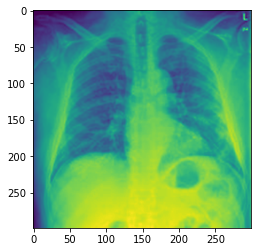

In [6]:
# Sample image of covid 19 normal images

from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
image = image.imread("COVID-19_Radiography_Dataset/COVID/COVID-120.PNG")
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

float32
(299, 299)


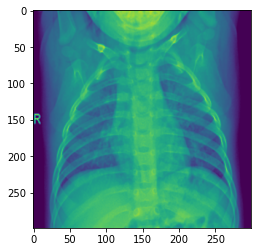

In [3]:
# Sample image of normal x-ray images

from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
image = image.imread("COVID-19_Radiography_Dataset/Normal/Normal-1000.PNG")
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [79]:
TARGET_DIR = "Dataset\Covid"

#we will use the os modules to create folders and move files in that
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid folder created")


In [1]:
for (i, row) in df.iterrows():
    filename = row["FILE NAME"]
    filename = filename + ".png"
    image_path = os.path.join(IMAGES_PATH, filename)
    image_copy_path = os.path.join(TARGET_DIR, filename)
    shutil.copy2(image_path, image_copy_path)   #this will transfer images image path to image copy path
 #   print("moving image", i+1, filename)

In [95]:
# taking same number of normal x-rays to make a dataset

normal_file_path = "COVID-19_Radiography_Dataset/Normal"
target_normal_dir = "Dataset/Normal"
image_names = os.listdir(normal_file_path)
print(len(image_names))


10192


In [96]:
random.shuffle(image_names)
print(len(os.listdir(target_normal_dir)))

0


In [2]:
#transfer images from normal directory to the target dataset
for i in range(3616):
    image_name = image_names[i]
    image_path = os.path.join(normal_file_path, image_name)
    shutil.copy2(image_path, target_normal_dir)
    print("copy image ", i, image_name)

In [3]:
normal_images = os.listdir(target_normal_dir)  #making list of all images
covid_images = os.listdir(TARGET_DIR)
random.shuffle(normal_images)
random.shuffle(covid_images)
#print(normal_images)
#print(covid_images)


In [99]:
print(len(normal_images), len(covid_images))

3616 3616


In [104]:
train_size = int(len(normal_images)*0.8)
test_size = len(normal_images) - test_size
print(test_size, train_size)

724 2892


In [4]:
# we are going to move 80% of covid images into train covid folder

TARGET_COVID_TRAIN_DIR = "Dataset/Train/Covid"

#we will use the os modules to create folders and move files in that
if not os.path.exists(TARGET_COVID_TRAIN_DIR):
    os.mkdir(TARGET_COVID_TRAIN_DIR)
   # print("Train Covid folder created")


    
for i in range(train_size):
    image_name = covid_images[i]
    image_path = os.path.join("Dataset/Covid", image_name)
    shutil.copy2(image_path, TARGET_COVID_TRAIN_DIR)
   # print("copy image ", i, image_name)
    
    

In [5]:
# we are moving 80% of normal images for training

TARGET_NORMAL_TRAIN_DIR = "Dataset/Train/Normal"

if not os.path.exists(TARGET_NORMAL_TRAIN_DIR):
    os.mkdir(TARGET_NORMAL_TRAIN_DIR)
  #  print("Train Normal folder created")
    
    
for i in range(train_size):
    image_name = normal_images[i]
    image_path = os.path.join("Dataset/Normal", image_name)
    shutil.copy2(image_path, TARGET_NORMAL_TRAIN_DIR)
   # print("copy image ", i, image_name)

In [6]:
# we are moving 20% of covid images for testing

TARGET_COVID_TEST_DIR = "Dataset/Test/Covid"

#we will use the os modules to create folders and move files in that
if not os.path.exists(TARGET_COVID_TEST_DIR):
    os.mkdir(TARGET_COVID_TEST_DIR)
  #  print("Test Covid folder created")


    
for i in range(test_size):
    image_name = covid_images[i]
    image_path = os.path.join("Dataset/Covid", image_name)
    shutil.copy2(image_path, TARGET_COVID_TEST_DIR)
 #   print("copy image ", i, image_name)


In [7]:
#we are moving 20 of normal images for testing    

TARGET_NORMAL_TEST_DIR = "Dataset/Test/Normal"

if not os.path.exists(TARGET_NORMAL_TEST_DIR):
    os.mkdir(TARGET_NORMAL_TEST_DIR)
  #  print("Test Normal folder created")
    
    
for i in range(test_size):
    image_name = normal_images[i]
    image_path = os.path.join("Dataset/Normal", image_name)
    shutil.copy2(image_path, TARGET_NORMAL_TEST_DIR)
    #print("copy image ", i, image_name)

# CNN model

In [1]:
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras_preprocessing import image
from keras.optimizers import Adam

In [71]:
# CNN Based model in Keras
#it is going to be sequential model means we actually have multiple layers where each layer have multiple filtes
#So it is going to be layered architechture

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (224,224, 3))) #32 is the number of filters
#kernel size = (3,3) is standard size which is also filter size
model.add(Conv2D(64,(3,3), activation = 'relu'))
# two convolutional layer will reduce the number of parameters as well as it increase the non linearty
model.add(MaxPooling2D(pool_size = (2,2))) #default size of pooling is 2,2
model.add(Dropout(0.25)) #it will reduce overfitting

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

 
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.50))
model.add(Dense(1,activation = 'sigmoid'))


#opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])
#we will do gradient descent optimization for adam and metrics on which we evaluate our model is going to be classification accuracy


In [72]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 54, 54, 64)       

In [73]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale=1./255)

#train_datagen is an obeject and this has a method called flow from directory


In [74]:
train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)
#we created generator because we are not going to load the at the once but in the batch size,
#that's why we created the generator here

Found 5784 images belonging to 2 classes.


In [75]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [76]:
validation_generator = test_datagen.flow_from_directory(
    'Dataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1448 images belonging to 2 classes.


In [77]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 20,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2,
)

Epoch 1/10
20/20 [==============================] - 139s 7s/step - loss: 1.4383 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 2/10
20/20 [==============================] - 132s 7s/step - loss: 0.6915 - accuracy: 0.5051 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 138s 7s/step - loss: 0.6874 - accuracy: 0.5274 - val_loss: 0.6619 - val_accuracy: 0.6094
Epoch 4/10
20/20 [==============================] - 135s 7s/step - loss: 0.6625 - accuracy: 0.5936 - val_loss: 0.6213 - val_accuracy: 0.7812
Epoch 5/10
20/20 [==============================] - 132s 6s/step - loss: 0.6166 - accuracy: 0.6462 - val_loss: 0.6898 - val_accuracy: 0.5312
Epoch 6/10
20/20 [==============================] - 130s 6s/step - loss: 0.6885 - accuracy: 0.5171 - val_loss: 0.6732 - val_accuracy: 0.5625
Epoch 7/10
20/20 [==============================] - 130s 6s/step - loss: 0.6743 - accuracy: 0.5805 - val_loss: 0.7111 - val_accuracy: 0.5625
Epoch 8/10
20

# Visualising Result


In [78]:
# list all data in history
print(hist.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


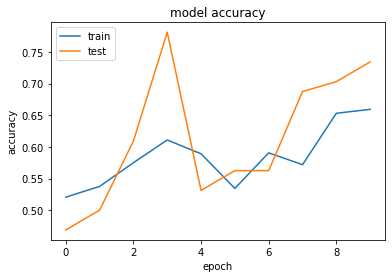

In [79]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

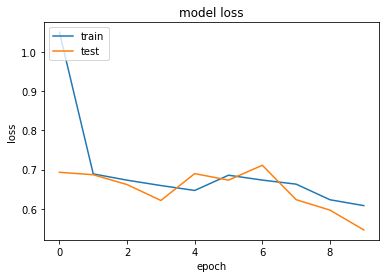

In [80]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()